# NBA Player Longevity Data Exploration

## Introduction 

With the increased understanding of medicine and the human body, players seem to know how to take care of themselves more now than ever before, enabling a long basketball career. The likes of Kareem Abdul-Jabbar, Kobe Bryant, Dirk Nowitzki, Kevin Garnett, and Tim Duncan sustained great basketball throughout their careers, many of who have retired just recently. I wanted to discover what factors may contribute to the number of years an NBA player would play and if we could adequately predict a player's career length. 

## Importing Libraries and Setting Up Environment

In [1]:
import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt
from plotnine import *

In [2]:
pd.set_option('display.max_columns', 500)

## Loading Data

In [3]:
df = pd.read_csv('players_updated1.csv')

print(df.shape)
df.head()


(4546, 35)


,active_from,active_to,college,height,name,position,weight,nba_3ptapg,nba_3ptpct,nba_3ptpg,nba_efgpct,nba_fg,nba_fg_per_game,nba_fga_per_game,nba_ft,nba_ft_per_g,nba_fta_p_g,nba_g_played,nba_ppg,ncaa_3ptapg,ncaa_3ptpct,ncaa_3ptpg,ncaa_efgpct,ncaa_fgapg,ncaa_fgpct,ncaa_fgpg,ncaa_ft,ncaa_ftapg,ncaa_ftpg,ncaa_games,ncaa_ppg,birth_year,career_length,bmi,age_entering_league
0,1991,1995,Duke University,82,Alaa Abdelnaby,F,240.0,0.0,0.000,0.0,0.502,0.502,2.4,4.8,0.701,0.9,1.3,256,5.7,0.0,NaN,0.0,0.589,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5,1968.0,4,25.1,23
1,1969,1978,Iowa State University,81,Zaid Abdul-Aziz,C,235.0,NaN,NaN,NaN,NaN,0.428,3.5,8.2,0.728,2.0,2.8,505,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1946.0,9,25.2,23
2,1970,1989,"University of California, Los Angeles",86,Kareem Abdul-Jabbar,C,225.0,0.0,0.056,0.0,0.559,0.559,10.2,18.1,0.721,4.3,6.0,1560,24.6,NaN,NaN,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4,1947.0,19,21.4,23
3,1991,2001,Louisiana State University,73,Mahmoud Abdul-Rauf,G,162.0,2.3,0.354,0.8,0.472,0.442,6.0,13.6,0.905,1.8,2.0,586,14.6,7.2,0.372,2.7,0.537,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0,1969.0,10,21.4,22
4,1998,2003,"University of Michigan, San Jose State University",78,Tariq Abdul-Wahad,F,223.0,0.3,0.237,0.1,0.422,0.417,3.1,7.3,0.703,1.6,2.2,236,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1974.0,5,25.8,24


## Data Exploration

### Career Length Distribution

Below is a graph that shows the distribution of players and their career length. Many players don't even play for an entire year in the league, but most likely these are G-league or short-term contract players. 

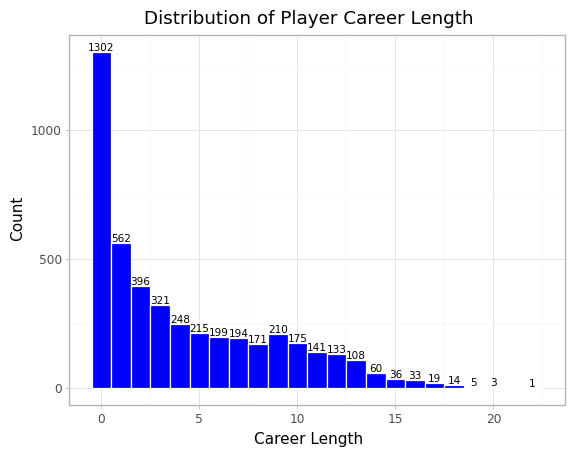

<ggplot: (29524989)>

In [4]:
bins = max(df['career_length']) + 1
ggplot(df, aes(x = 'career_length')) +\
    geom_histogram(bins = bins, fill = 'blue', color = 'white') +\
    geom_text(aes(label = 'stat(count)'), stat = 'count', size = 7.5, va = 'bottom') +\
    ggtitle("Distribution of Player Career Length") +\
    xlab("Career Length") +\
    ylab("Count") +\
    theme_light()



### Career Length Distribution for Non-Active Players

This dataset includes players up to the 2018 season. In the 'active_to' column for those who played through the 2018 season, they are marked as '2018' even though their career hasn't ended. I got rid of all of the players who had '2018' for that column since their careers are still going on; however, this means I also got rid of some players who actually retired in 2018. We can see from the change in shape from the original dataframe to the new one that we deleted 533 players from the set (4575 - 4042).

In [5]:
nonactive = df[df['active_to'] != 2018]
nonactive.shape

(4012, 35)

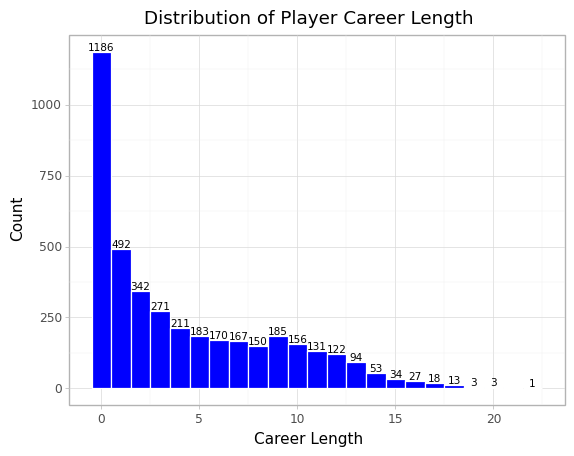

<ggplot: (29583264)>

In [6]:
ggplot(nonactive, aes(x = 'career_length')) +\
    geom_histogram(bins = bins, fill = 'blue', color = 'white') +\
    geom_text(aes(label = 'stat(count)'), stat = 'count', size = 7.5, va = 'bottom') +\
    ggtitle("Distribution of Player Career Length") +\
    xlab("Career Length") +\
    ylab("Count") +\
    theme_light()

### Career Length by Position

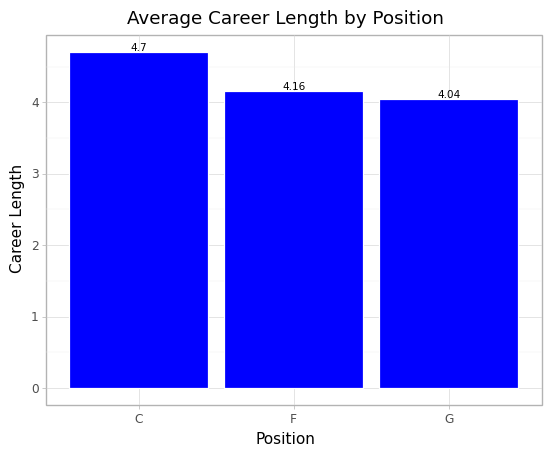

<ggplot: (29688854)>

In [7]:
length_by_position = round(nonactive.groupby('position').mean(), 2)
length_by_position.reset_index(inplace=True)
ggplot(length_by_position, aes(x = 'position', y = 'career_length')) +\
    geom_bar(stat = "identity", fill = 'blue', color = 'white') +\
    geom_text(aes(label = 'career_length'), size = 7.5, va = 'bottom') +\
    ggtitle("Average Career Length by Position") +\
    xlab("Position") +\
    ylab("Career Length") +\
    theme_light()

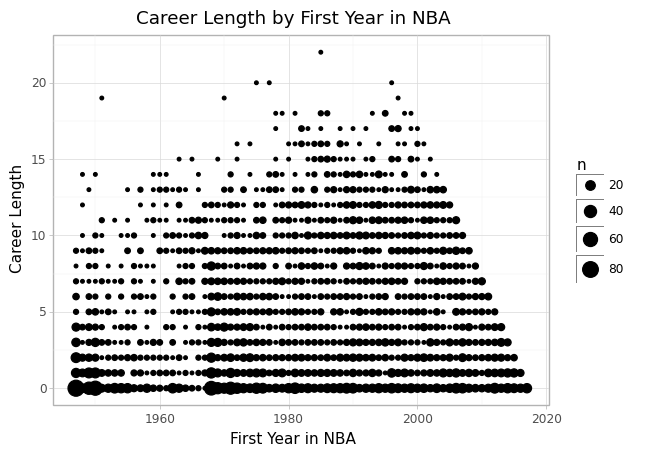

<ggplot: (-2117790499)>

In [8]:
ggplot(nonactive, aes(x = 'active_from', y = 'career_length')) +\
    geom_point(stat = 'sum') +\
    ggtitle("Career Length by First Year in NBA") +\
    xlab("First Year in NBA") +\
    ylab("Career Length") +\
    theme_light()

C:\Users\samue\AppData\Local\Programs\Python\Python38-32\lib\site-packages\plotnine\layer.py:369: PlotnineWarning: stat_sum : Removed 4 rows containing non-finite values.


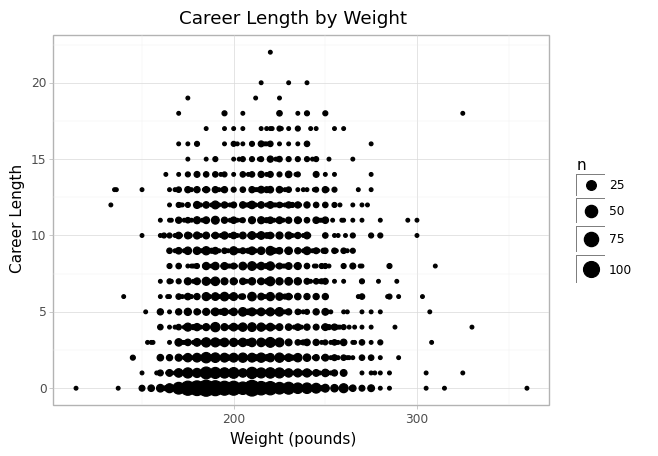

<ggplot: (-2117703176)>

In [9]:
ggplot(nonactive, aes(x = 'weight', y = 'career_length')) +\
    geom_point(stat = 'sum') +\
    ggtitle("Career Length by Weight") +\
    xlab("Weight (pounds)") +\
    ylab("Career Length") +\
    theme_light()

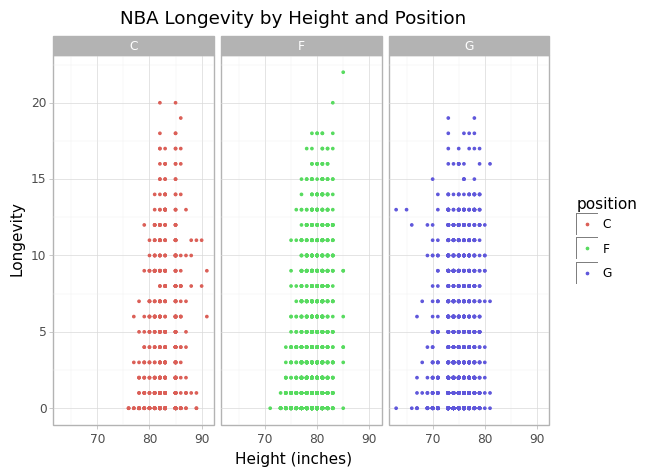

<ggplot: (31128049)>

In [14]:
ggplot(nonactive, aes(x = 'height', y = 'career_length')) +\
    geom_point(aes(color='position'), size = 0.5) +\
    facet_wrap('position') +\
    ggtitle("NBA Longevity by Height and Position") +\
    xlab("Height (inches)") +\
    ylab("Longevity") +\
    theme_light()

C:\Users\samue\AppData\Local\Programs\Python\Python38-32\lib\site-packages\plotnine\layer.py:464: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


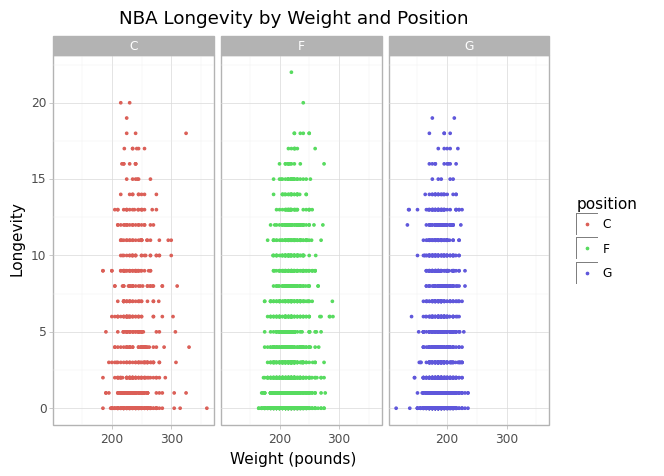

<ggplot: (31118240)>

In [11]:
ggplot(nonactive, aes(x = 'weight', y = 'career_length')) +\
    geom_point(aes(color='position'), size = 0.5) +\
    facet_wrap('position') +\
    ggtitle("NBA Longevity by Weight and Position") +\
    xlab("Weight (pounds)") +\
    ylab("Longevity") +\
    theme_light()

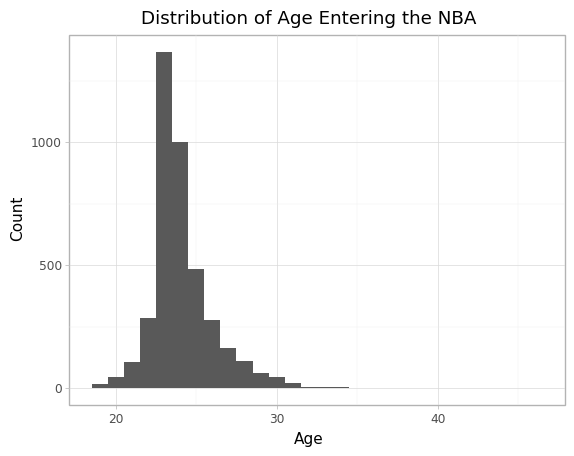

<ggplot: (-2117746795)>

In [40]:
bins = max(nonactive['age_entering_league']) - min(nonactive['age_entering_league']) + 1

ggplot(nonactive, aes(x = 'age_entering_league')) +\
    geom_histogram(bins = bins) +\
    ggtitle("Distribution of Age Entering the NBA") +\
    xlab("Age") +\
    ylab("Count") +\
    theme_light()

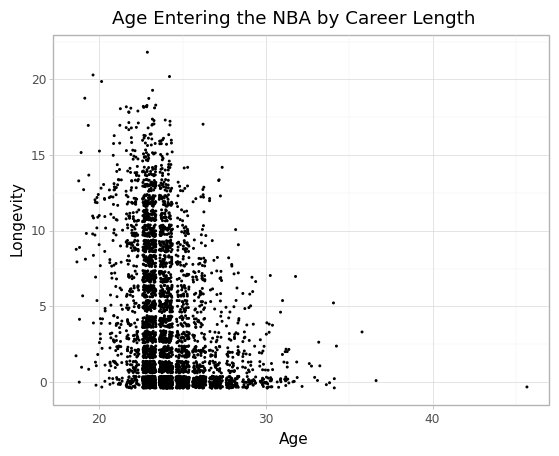

<ggplot: (-2146151176)>

In [41]:
ggplot(nonactive, aes(x = 'age_entering_league', y = 'career_length')) +\
    geom_jitter(aes(x = 'age_entering_league', y = 'career_length'), size = 0.2) +\
    ggtitle("Age Entering the NBA by Career Length") +\
    xlab("Age") +\
    ylab("Longevity") +\
    theme_light()